# Charles Tewksbury 
# Project 2

In [686]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#from scipy import stats

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [687]:
# Read CSV File into "data " dataframe"
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# EDA
 # Univariate Analysis

In [688]:
# Lets peek at the data 
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [689]:
# Check out the shape
data.shape

(5000, 14)

# 5000 rows with 14 columns

In [690]:
# Clean Up and Dupliates
data.drop_duplicates()
# Check for any null data
data.isnull().values.any()

False

In [691]:
# General Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [692]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


# Questions from Project

In [693]:
# Lets take a look at how many unique values there are per column.
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [694]:
print("Number of people with zero mortgage")
print(len(data[data['Mortgage'] == 0]))


Number of people with zero mortgage
3462


In [695]:
print("Number of peope with zero CC Spending per month")
print(len(data[data['CCAvg'] == 0]))

Number of peope with zero CC Spending per month
106


In [696]:
print("Education=\n%s" % (data['Education'].value_counts(normalize=True)))
print("\n")
print("Securities Account=\n%s" % (data['Securities Account'].value_counts(normalize=True)))
print("\n")
print("CD Account=\n%s" % (data['CD Account'].value_counts(normalize=True)))
print("\n")
print("Online=\n%s" % (data['Online'].value_counts(normalize=True)))
print("\n")
print("CreditCard=\n%s" % (data['CreditCard'].value_counts(normalize=True)))
print("\n")
print("Personal Loan=\n%s" % (data['Personal Loan'].value_counts(normalize=True)))


Education=
1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64


Securities Account=
0   0.90
1   0.10
Name: Securities Account, dtype: float64


CD Account=
0   0.94
1   0.06
Name: CD Account, dtype: float64


Online=
1   0.60
0   0.40
Name: Online, dtype: float64


CreditCard=
0   0.71
1   0.29
Name: CreditCard, dtype: float64


Personal Loan=
0   0.90
1   0.10
Name: Personal Loan, dtype: float64


# Take a look at the histograms of each of the columns

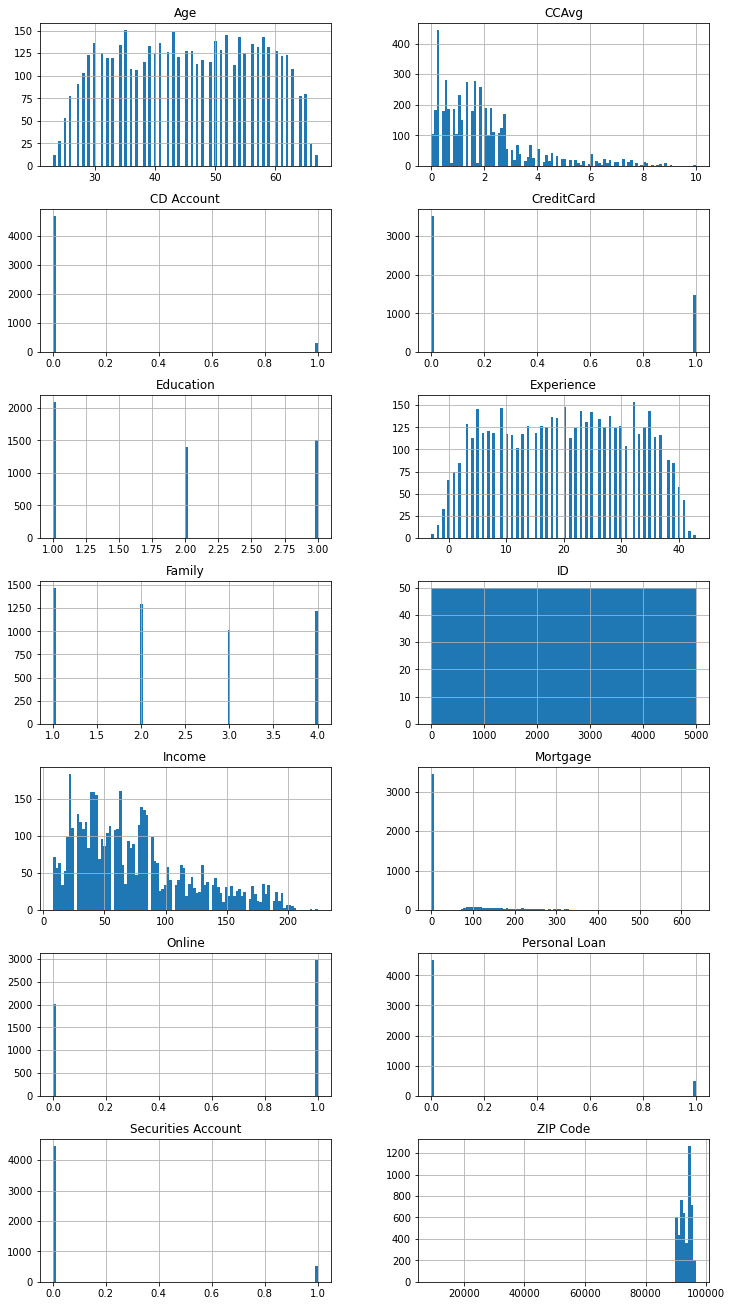

In [697]:
columns = list(data)[0:]
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(9,2));

# Looks like 5 of the columns are categorical in nature: CD Account, Credit Card, Education, Online, Securites Account. 
# Family "could" be categorical in that there is not one with a family grerater than 4. Considering two parents, it seems weird that there are no families with three children.  Not exatly sure what thsi column is saying either. Is teh family children or complete unit? Considering the cvalues of each are pretty close, may end up simply droping this column as I don't see how it could be a major player in the model.
# Want to look at mnortgage in more detail as fromtjhe graph it appears as if it really could not play much of a role either.

In [698]:
# For Grins lets see number of Approved Loans
print("Personal Loan=\n%s" % (data['Personal Loan'].value_counts()))

Personal Loan=
0    4520
1     480
Name: Personal Loan, dtype: int64


 # Analysis - Thi sis not gogin to be a loty oif data to go on. With 1 in 10 bnign apporved, any model will be limited.

# Bivariate Analysis

In [699]:
# Look at teh coorelation of each of the fields. Speciifcally interested in its play on Personal Loan.
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


# There appear to be only three columns that have a "significant" positive correlation: Income, CCAvg, CD Account. Education and Mortgage do have some correlation. There are no columns that have a significant neative correlation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


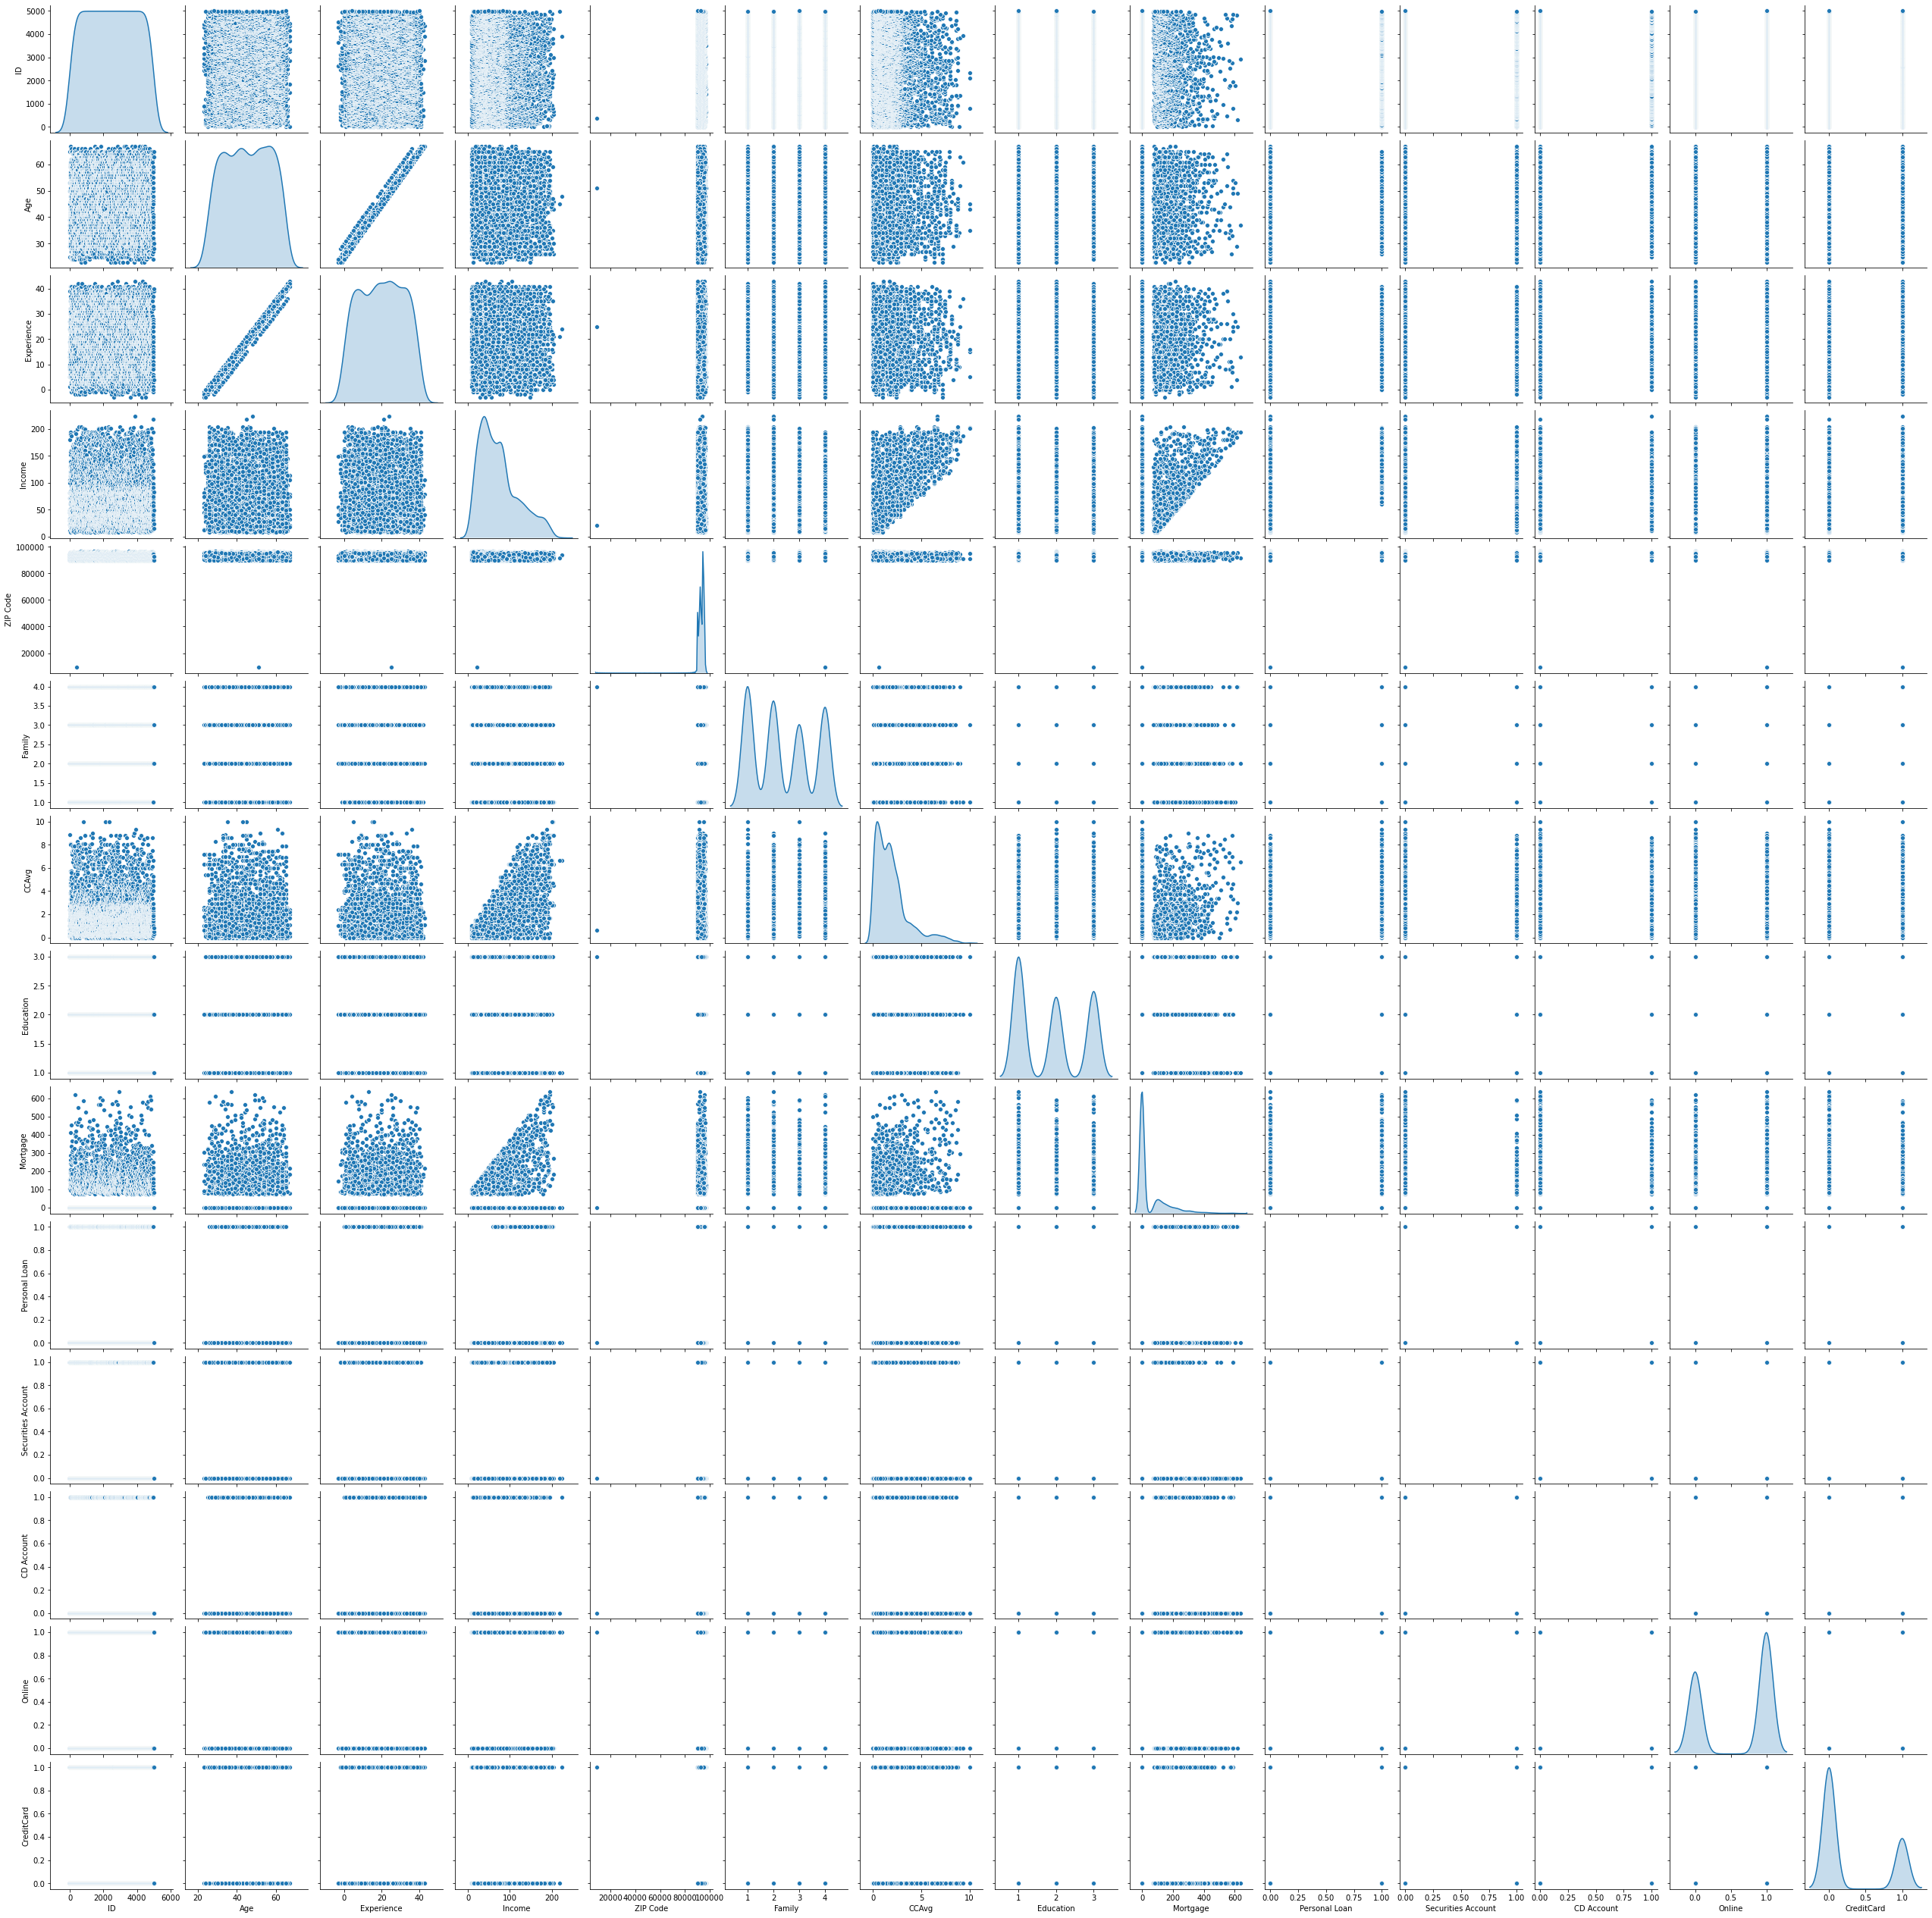

In [700]:
# Lets take a look at taht viar the pair plot to seeit visually. 
sns.pairplot(data, diag_kind='kde')

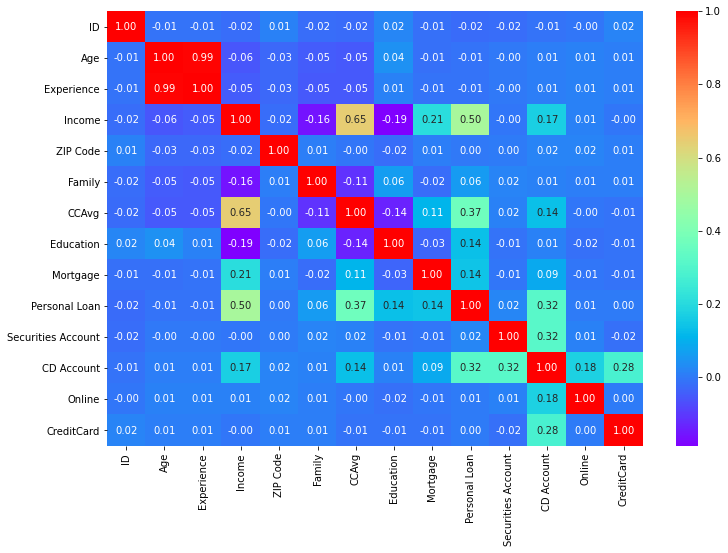

In [704]:
# Also lets show a heat map just so I may be able to see it clearer
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [705]:
data.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,"2,512.17",45.37,20.13,66.24,"93,152.43",2.37,1.73,1.84,51.79,0.10,0.04,0.60,0.29
1,"2,390.65",45.07,19.84,144.75,"93,153.20",2.61,3.91,2.23,100.85,0.12,0.29,0.61,0.30


In [706]:
data.groupby(["Personal Loan"]).median()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,"2,518.50",45.00,20.00,59.00,"93,437.00",2.00,1.40,2.00,0.00,0.00,0.00,1.00,0.00
1,"2,342.00",45.00,20.00,142.50,"93,407.00",3.00,3.80,2.00,0.00,0.00,0.00,1.00,0.00


# Prep the data the way I want it to start modelling.

In [731]:
# Read CSV Again, just in case I have altered it earlier
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [732]:
data = pd.concat([data, pd.get_dummies(data['Education'], prefix="edu", drop_first=True)], axis=1); data
data.drop(columns="Education", inplace=True)#
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,edu_2,edu_3
0,1,25,1,49,91107,4,1.60,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.50,0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.00,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.00,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.90,0,0,0,0,1,0,0,1
4996,4997,30,4,15,92037,4,0.40,85,0,0,0,1,0,0,0
4997,4998,63,39,24,93023,2,0.30,0,0,0,0,0,0,0,1
4998,4999,65,40,49,90034,3,0.50,0,0,0,0,1,0,1,0


In [733]:
data.drop(columns="ID", inplace=True)
# Move PersonalLoan othe last column.  There is undoubtedly a better python way of doing this. 
# Since I haven't been ableot figure it out, I am simply going to add an approved column that equals "PersonalLoan"
# and then delete that.
data['Approved'] = data['Personal Loan']
data.drop(columns="Personal Loan", inplace=True)
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,edu_2,edu_3,Approved
0,25,1,49,91107,4,1.60,0,1,0,0,0,0,0,0
1,45,19,34,90089,3,1.50,0,1,0,0,0,0,0,0
2,39,15,11,94720,1,1.00,0,0,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,0,0,0,0,0,1,0,0
4,35,8,45,91330,4,1.00,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90,0,0,0,1,0,0,1,0
4996,30,4,15,92037,4,0.40,85,0,0,1,0,0,0,0
4997,63,39,24,93023,2,0.30,0,0,0,0,0,0,1,0
4998,65,40,49,90034,3,0.50,0,0,0,1,0,1,0,0


# Lets set up the model - All Columns

In [734]:
Y = data['Approved']
X = data.drop(columns = ['Approved'])
# Lets lok at what our training data really potentailly is.
X


,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,edu_2,edu_3
0,25,1,49,91107,4,1.60,0,1,0,0,0,0,0
1,45,19,34,90089,3,1.50,0,1,0,0,0,0,0
2,39,15,11,94720,1,1.00,0,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.00,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90,0,0,0,1,0,0,1
4996,30,4,15,92037,4,0.40,85,0,0,1,0,0,0
4997,63,39,24,93023,2,0.30,0,0,0,0,0,0,1
4998,65,40,49,90034,3,0.50,0,0,0,1,0,1,0


In [735]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [736]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [737]:
#from sklearn import metrics

#from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)
#predict on test
Y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0     1    2     3    4    5    6    7    8     9    10   11   12  \
0 -0.00 -0.00 0.04 -0.00 0.02 0.01 0.00 0.00 0.01 -0.00 -0.00 0.01 0.01   

   intercept  
0      -0.00  


In [738]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.9073333333333333


In [739]:
logreg = LogisticRegression(random_state=12345,fit_intercept=False)
logreg.fit(X_train, Y_train)                    # fit the model on train data
Y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

z = X_test.copy()
z['Observed Loan Status'] = Y_test
z['Predicted Loan Status'] = Y_predict
z.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,edu_2,edu_3,Observed Loan Status,Predicted Loan Status
2764,31,5,84,91320,1,2.90,105,0,0,0,1,0,1,0,0
4767,35,9,45,90639,3,0.90,101,1,0,0,0,0,0,0,0
3814,34,9,35,94304,3,1.30,0,0,0,0,0,0,0,0,0
3499,49,23,114,94550,1,0.30,286,0,0,1,0,0,0,0,0
2735,36,12,70,92131,3,2.60,165,0,0,1,0,1,0,0,0


In [740]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9082857142857143

Testing accuracy 0.908

Confusion Matrix


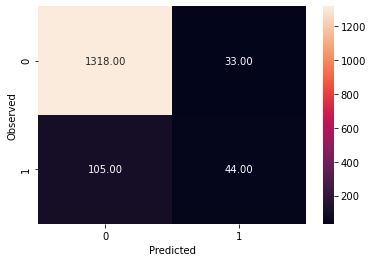

None

Recall: 0.2953020134228188

Precision: 0.5714285714285714

F1 Score: 0.3893805309734513

Roc Auc Score: 0.6354378312857988


In [741]:

print("Training accuracy",logreg.score(X_train,Y_train))  
print()
print("Testing accuracy",logreg.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
print()
print("Recall:",recall_score(Y_test,Y_predict))
print()
print("Precision:",precision_score(Y_test,Y_predict))
print()
print("F1 Score:",f1_score(Y_test,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Y_predict))

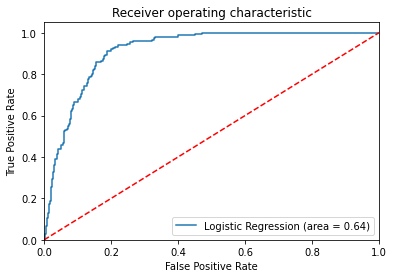

In [742]:

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [776]:
rslt_df = z[z['Observed Loan Status'] != z['Predicted Loan Status']] 
  
rslt_df


,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,edu_2,edu_3,Observed Loan Status,Predicted Loan Status
1513,45,21,183,95211,2,1.40,354,0,0,0,0,0,0,0,1
4377,33,8,145,92507,1,2.70,0,0,0,1,0,0,1,1,0
3988,59,35,85,91330,1,3.40,0,0,1,0,1,0,1,1,0
3271,52,27,93,90291,4,4.10,0,0,0,0,1,1,0,1,0
349,26,2,60,93407,2,3.00,132,0,0,0,0,0,0,1,0
927,65,40,95,95014,3,3.70,138,0,0,0,1,1,0,1,0
1524,40,16,155,94002,4,0.10,0,0,1,1,1,0,1,1,0
1273,60,35,130,95741,3,6.30,437,0,1,1,1,0,1,1,0
1626,31,6,180,93108,2,6.70,0,0,0,0,0,0,0,0,1
4284,38,13,173,94305,2,3.30,243,0,0,0,0,0,0,0,1


# Create a new model with absolute worse score
# Use new Dataframes for X so we can get back to older ones if needed.

In [743]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,edu_2,edu_3,Approved
0,25,1,49,91107,4,1.60,0,1,0,0,0,0,0,0
1,45,19,34,90089,3,1.50,0,1,0,0,0,0,0,0
2,39,15,11,94720,1,1.00,0,0,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,0,0,0,0,0,1,0,0
4,35,8,45,91330,4,1.00,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90,0,0,0,1,0,0,1,0
4996,30,4,15,92037,4,0.40,85,0,0,1,0,0,0,0
4997,63,39,24,93023,2,0.30,0,0,0,0,0,0,1,0
4998,65,40,49,90034,3,0.50,0,0,0,1,0,1,0,0


In [744]:
data['Bad-Data'] = '0'

In [745]:
# Create a column with all zeros or modelling
# Drop everythign but the bad data
YW = data['Approved']  # Not needed, could continue to simply use Y, but adding new var just to keep seperate
# For that matter, goignt o havbe all new vars for each just so can reference later, if neeedd.
XW = data.drop(columns = {'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'edu_2', 'edu_3', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Approved',})
XW


XW_train, XW_test, YW_train, YW_test = train_test_split(XW, YW, test_size=0.30 , random_state=1)
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(XW_train, YW_train)
#redict on test
YW_predict = model.predict(XW_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
model_score = model.score(XW_test, YW_test)
print(model_score)

     0  intercept
0 0.00      -2.25
0.9006666666666666


In [778]:
logreg = LogisticRegression(random_state=12345,fit_intercept=False)
logreg.fit(XW_train, YW_train)                    # fit the model on train data
YW_predict = logreg.predict(XW_test)              # Predicting the target variable on test data

zW = XW_test.copy()
zW['Observed Loan Status'] = YW_test
zW['Predicted Loan Status'] = YW_predict


Training accuracy 0.9054285714285715

Testing accuracy 0.9006666666666666

Confusion Matrix


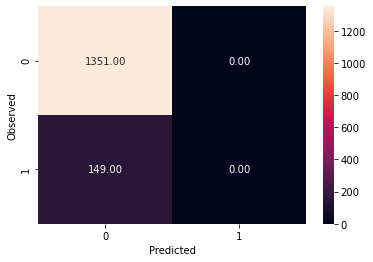

None

Recall: 0.0

Precision: 0.0

F1 Score: 0.0

Roc Auc Score: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [747]:
print("Training accuracy",logreg.score(XW_train,YW_train))  
print()
print("Testing accuracy",logreg.score(XW_test, YW_test))
print()
print('Confusion Matrix')
print(draw_cm(YW_test,YW_predict))
print()
print("Recall:",recall_score(YW_test,YW_predict))
print()
print("Precision:",precision_score(YW_test,YW_predict))
print()
print("F1 Score:",f1_score(YW_test,YW_predict))
print()
print("Roc Auc Score:",roc_auc_score(YW_test,YW_predict))

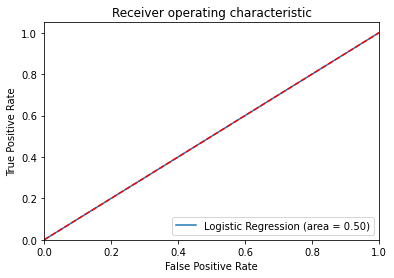

In [748]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(YW_test, logreg.predict(XW_test))
fpr, tpr, thresholds = roc_curve(YW_test, logreg.predict_proba(XW_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [779]:

rslt_df = zW[zW['Observed Loan Status'] != zW['Predicted Loan Status']] 
  
print('\nResult dataframe :\n', rslt_df) 



Result dataframe :
      Bad-Data  Observed Loan Status  Predicted Loan Status
2721        0                     1                      0
4494        0                     1                      0
348         0                     1                      0
4377        0                     1                      0
3988        0                     1                      0
3271        0                     1                      0
349         0                     1                      0
927         0                     1                      0
2968        0                     1                      0
1524        0                     1                      0
1273        0                     1                      0
1038        0                     1                      0
1518        0                     1                      0
4883        0                     1                      0
1444        0                     1                      0
2784        0                     1

# Create a custom model based on the columns I think are pertinent, hopefully removing some noise.

In [749]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,edu_2,edu_3,Approved,Bad-Data
0,25,1,49,91107,4,1.60,0,1,0,0,0,0,0,0,0
1,45,19,34,90089,3,1.50,0,1,0,0,0,0,0,0,0
2,39,15,11,94720,1,1.00,0,0,0,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,0,0,0,0,0,1,0,0,0
4,35,8,45,91330,4,1.00,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.90,0,0,0,1,0,0,1,0,0
4996,30,4,15,92037,4,0.40,85,0,0,1,0,0,0,0,0
4997,63,39,24,93023,2,0.30,0,0,0,0,0,0,1,0,0
4998,65,40,49,90034,3,0.50,0,0,0,1,0,1,0,0,0


In [750]:
YG = data['Approved']
XG = data.drop(columns = ['Age', 'Experience', 'Securities Account', 'Online', 'ZIP Code', 'Family','CreditCard', 'Bad-Data'])
# Lets lok at what our training data really potentailly is.
XG


,Income,CCAvg,Mortgage,CD Account,edu_2,edu_3,Approved
0,49,1.60,0,0,0,0,0
1,34,1.50,0,0,0,0,0
2,11,1.00,0,0,0,0,0
3,100,2.70,0,0,1,0,0
4,45,1.00,0,0,1,0,0
...,...,...,...,...,...,...,...
4995,40,1.90,0,0,0,1,0
4996,15,0.40,85,0,0,0,0
4997,24,0.30,0,0,0,1,0
4998,49,0.50,0,0,1,0,0


In [751]:
XG_train, XG_test, YG_train, YG_test = train_test_split(XG, YG, test_size=0.30 , random_state=1)
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(XG_train, YG_train)
#redict on test
YG_predict = model.predict(XG_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
model_score = model.score(XG_test, YG_test)
print(model_score)

     0    1     2    3     4     5    6  intercept
0 0.01 0.05 -0.00 0.61 -0.04 -0.03 8.39      -5.95
1.0


In [752]:
logreg = LogisticRegression(random_state=12345,fit_intercept=False)
logreg.fit(XG_train, YG_train)                    # fit the model on train data
YG_predict = logreg.predict(XG_test)              # Predicting the target variable on test data

zG = XG_test.copy()
zG['Observed Loan Status'] = YG_test
zG['Predicted Loan Status'] = YG_predict
zG.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Income,CCAvg,Mortgage,CD Account,edu_2,edu_3,Approved,Observed Loan Status,Predicted Loan Status
2764,84,2.90,105,0,0,1,0,0,0
4767,45,0.90,101,0,0,0,0,0,0
3814,35,1.30,0,0,0,0,0,0,0
3499,114,0.30,286,0,0,0,0,0,0
2735,70,2.60,165,0,1,0,0,0,0


Training accuracy 1.0

Testing accuracy 1.0

Confusion Matrix


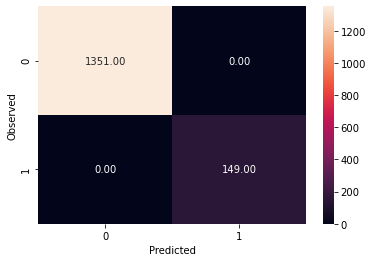

None

Recall: 1.0

Precision: 1.0

F1 Score: 1.0

Roc Auc Score: 1.0


In [753]:
print("Training accuracy",logreg.score(XG_train,YG_train))  
print()
print("Testing accuracy",logreg.score(XG_test, YG_test))
print()
print('Confusion Matrix')
print(draw_cm(YG_test,YG_predict))
print()
print("Recall:",recall_score(YG_test,YG_predict))
print()
print("Precision:",precision_score(YG_test,YG_predict))
print()
print("F1 Score:",f1_score(YG_test,YG_predict))
print()
print("Roc Auc Score:",roc_auc_score(YG_test,YG_predict))

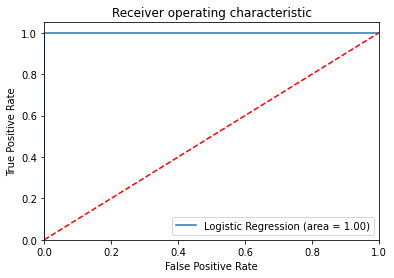

In [754]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(YG_test, logreg.predict(XG_test))
fpr, tpr, thresholds = roc_curve(YG_test, logreg.predict_proba(XG_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [777]:
rslt_df = zG[zG['Observed Loan Status'] != zG['Predicted Loan Status']] 
  
rslt_df


,Income,CCAvg,Mortgage,CD Account,edu_2,edu_3,Approved,Observed Loan Status,Predicted Loan Status


In [765]:
# While the CM and the matched set above shows it, lets see if I really found 100% of the actual Personal Loans
import collections, numpy

print(collections.Counter(YG_test))
print(collections.Counter(YG_predict))

Counter({0: 1351, 1: 149})
Counter({0: 1351, 1: 149})


# Conclusions

# I created three different models. The first was based upon all data.  While giving a reasonable accurate (>90%) results, it did provide too much noise. The second was a model based upon the worse data I could find. It also provided a decent score and good accuracy but this was due to the extremely limited output set of Personal Loans taken in general. In short, predicting zero loans approved was close enough to the actual number approved to provide > 90% accuracy. The third model, I limited my raining data to select columns based upon the analysis done earlier. It stated that I had a 100% accuracy.

    

# From a business sense, based on the limited data in the set, my model is accurate enough to be used.
